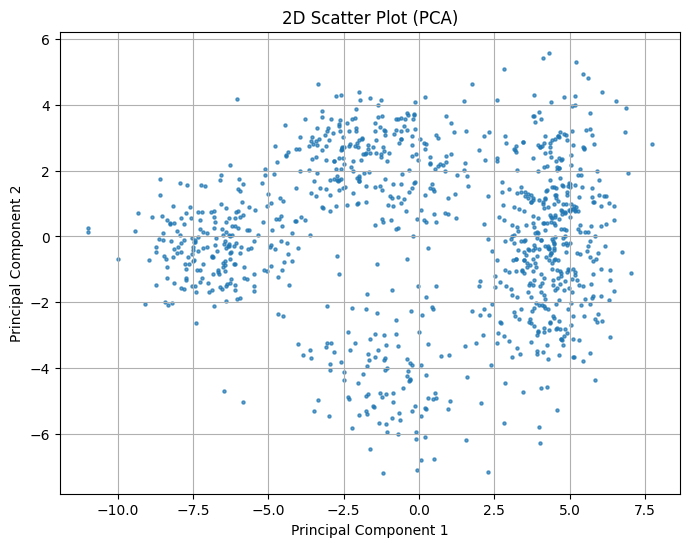

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


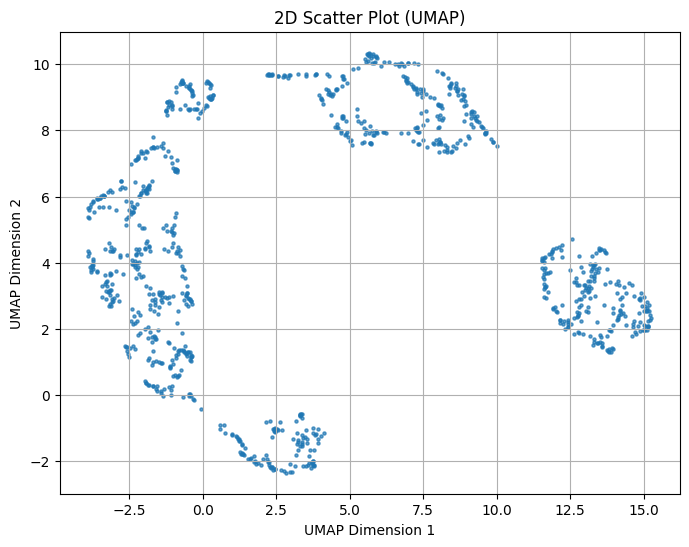

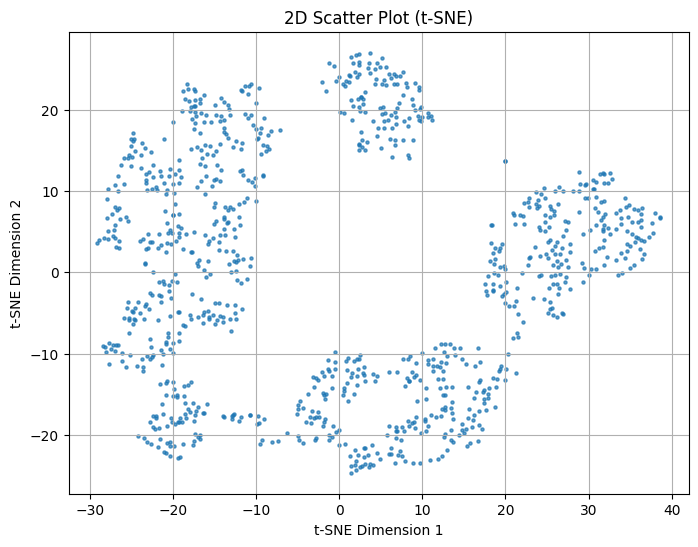

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap


def load_data(file_path):
    return np.loadtxt(file_path)


def perform_pca(data, n_components=2):

    centered_data = data - np.mean(data, axis=0)
    cov_matrix = np.cov(centered_data, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    top_eigenvectors = eigenvectors[:, :n_components]
    reduced_data = np.dot(centered_data, top_eigenvectors)
    return reduced_data, eigenvalues, eigenvectors

def perform_umap(data, n_components=2, random_state=42):
    reducer = umap.UMAP(n_components=n_components, random_state=random_state)
    return reducer.fit_transform(data)


def perform_tsne(data, n_components=2, random_state=42, perplexity=30, n_iter=500):
    tsne = TSNE(n_components=n_components, random_state=random_state, perplexity=perplexity, n_iter=n_iter)
    return tsne.fit_transform(data)


def plot_2d(data, title, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], s=5, alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

def main():

    data = load_data('pca_data.txt')
    
    pca_data, _, _ = perform_pca(data, n_components=2)
    plot_2d(pca_data, title="2D Scatter Plot (PCA)", xlabel="Principal Component 1", ylabel="Principal Component 2")
    
    umap_data = perform_umap(data, n_components=2)
    plot_2d(umap_data, title="2D Scatter Plot (UMAP)", xlabel="UMAP Dimension 1", ylabel="UMAP Dimension 2")
    
    tsne_data = perform_tsne(data, n_components=2)
    plot_2d(tsne_data, title="2D Scatter Plot (t-SNE)", xlabel="t-SNE Dimension 1", ylabel="t-SNE Dimension 2")

S
if __name__ == "__main__":
    main()


In [2]:
import numpy as np
from scipy.special import factorial

def load_data(file_path):
    return np.loadtxt(file_path)

def initialize_parameters():
    np.random.seed(42)
    mean_with_fp = np.random.uniform(1, 5)  
    mean_without_fp = np.random.uniform(5, 10)  
    proportion_fp = 0.5 
    return mean_with_fp, mean_without_fp, proportion_fp

def e_step(data, mean_with_fp, mean_without_fp, proportion_fp):
  
    prob_with_fp = proportion_fp * (mean_with_fp ** data) * np.exp(-mean_with_fp) / factorial(data).clip(min=1)
    prob_without_fp = (1 - proportion_fp) * (mean_without_fp ** data) * np.exp(-mean_without_fp) / factorial(data).clip(min=1)
    responsibilities = prob_with_fp / (prob_with_fp + prob_without_fp)
    return responsibilities

def m_step(data, responsibilities):
    new_mean_with_fp = np.sum(responsibilities * data) / np.sum(responsibilities)
    new_mean_without_fp = np.sum((1 - responsibilities) * data) / np.sum(1 - responsibilities)
    new_proportion_fp = np.mean(responsibilities)
    return new_mean_with_fp, new_mean_without_fp, new_proportion_fp

def has_converged(mean_with_fp, new_mean_with_fp, mean_without_fp, new_mean_without_fp, 
                  proportion_fp, new_proportion_fp, tolerance):

    return (abs(new_mean_with_fp - mean_with_fp) < tolerance and
            abs(new_mean_without_fp - mean_without_fp) < tolerance and
            abs(new_proportion_fp - proportion_fp) < tolerance)

def expectation_maximization(data, max_iterations=200, tolerance=1e-6):

    mean_with_fp, mean_without_fp, proportion_fp = initialize_parameters()
    
    for iteration in range(max_iterations):
        
        responsibilities = e_step(data, mean_with_fp, mean_without_fp, proportion_fp)
        
        new_mean_with_fp, new_mean_without_fp, new_proportion_fp = m_step(data, responsibilities)
        
        if has_converged(mean_with_fp, new_mean_with_fp, mean_without_fp, new_mean_without_fp, 
                         proportion_fp, new_proportion_fp, tolerance):
            break
        
        mean_with_fp, mean_without_fp, proportion_fp = new_mean_with_fp, new_mean_without_fp, new_proportion_fp
    
    return mean_with_fp, mean_without_fp, proportion_fp

def main():
    file_path = 'em_data.txt'
    
    data = load_data(file_path)
    
    mean_with_fp, mean_without_fp, proportion_fp = expectation_maximization(data)
    
    print("EM Algorithm Results:")
    print(f"Mean (with family planning): {mean_with_fp:.4f}")
    print(f"Mean (without family planning): {mean_without_fp:.4f}")
    print(f"Proportion (with family planning): {proportion_fp:.4f}")
    print(f"Proportion (without family planning): {1 - proportion_fp:.4f}")

if __name__ == "__main__":
    main()


EM Algorithm Results:
Mean (with family planning): 1.7824
Mean (without family planning): 4.9107
Proportion (with family planning): 0.3560
Proportion (without family planning): 0.6440
